In [1]:
#import cdsapi
import cfgrib as cf
import xarray as xr
import matplotlib.pyplot as plt

from shapely.geometry import Point
from haversine import haversine

In [2]:
!cdo griddes data/mescan-surfex/temperature/mescan-surfex-temperature-2014.grib > grid_temperature.txt

cdo griddes: Processed 1 variable [0.12s 60MB]


In [3]:
!cat grid_temperature.txt

#
# gridID 1
#
gridtype  = projection
gridsize  = 1142761
xsize     = 1069
ysize     = 1069
xname     = x
xunits    = "m"
yname     = y
yunits    = "m"
xfirst    = 0
xinc      = 5500
yfirst    = 0
yinc      = 5500
uvRelativeToGrid = 1
scanningMode = 64
grid_mapping = Lambert_Conformal
grid_mapping_name = lambert_conformal_conic
standard_parallel = 50.
longitude_of_central_meridian = 8.
latitude_of_projection_origin = 50.
earth_radius = 6367470.
false_easting = 2935285.29283097
false_northing = 2935298.11307955
longitudeOfFirstGridPointInDegrees = 342.514
latitudeOfFirstGridPointInDegrees = 20.292


In [4]:
# longitude 4.5, 32
# latitude 53.5, 71.5

In [5]:
p1 = (71.5, 4.5)
p2 = (71.5, 32.)

In [6]:
haversine(p1, p2)

961.9015485181604

In [7]:
p3 = (53.5, 4.5)
p4 = (53.5, 32)

In [8]:
haversine(p3, p4)

1807.5351330749236

In [9]:
(961/5.5, 1807/5.5)

(174.72727272727272, 328.54545454545456)

In [10]:
(32-4.5)/329

0.08358662613981763

In [11]:
haversine(p1, p3)

2001.5114442035929

In [12]:
haversine(p2, p4)

2001.5114442035929

In [13]:
2000/5.5

363.6363636363636

In [14]:
(71.5-53.5)/363

0.049586776859504134

In [16]:
%%writefile outgrid_nordics.txt
gridtype = lonlat
xsize = 329
ysize = 364
xfirst = 4.5
yfirst = 53.5
xinc = 0.08358662613981763
yinc = 0.049586776859504134
xunits = "degrees"
yunits = "degrees"

Overwriting outgrid_nordics.txt


In [3]:
!ls data-temp

lost+found  mescan-surfex-precipitation-daily-mean-2000-2015.grib


In [4]:
for y in range(2000,2015):
    print(f'Processing year: {y}')
    !cdo -f nc remapbil,outgrid_nordics.txt -shifttime,3hour data-temp/mescan-surfex-temperature-{y}.grib data-temp/mescan-surfex-nordics-temperature-{y}.nc

Processing year: 2000
cdo remapbil: Started child process "shifttime,3hour data-temp/mescan-surfex-temperature-2000.grib (pipe1.1)".
cdo remapbil: SCRIP bilinear weights from curvilinear (1069x1069) to lonlat (329x364) grid
cdo remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo(2) shifttime: Processed 1673002104 values from 1 variable over 1464 timesteps [25.52s]
cdo remapbil: Processed 1673002104 values from 1 variable over 1464 timesteps [25.52s 248MB]
Processing year: 2001
cdo remapbil: Started child process "shifttime,3hour data-temp/mescan-surfex-temperature-2001.grib (pipe1.1)".
cdo remapbil: SCRIP bilinear weights from curvilinear (1069x1069) to lonlat (329x364) grid
cdo remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6

In [2]:
ds = xr.open_dataset('data-temp/mescan-surfex-nordics-temperature-2000.nc')

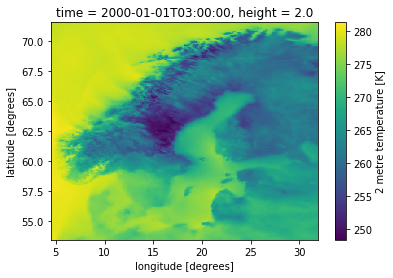

In [3]:
ds['2t'][0,:,:].plot()